In [341]:
import pandas as pd


In [342]:
import matplotlib.pyplot as plt


In [343]:

from mwviews.api import PageviewsClient

# Sends a descriptive User-Agent header with every request
p = PageviewsClient(user_agent="<person@organization.org> Selfie, Cat, and Dog analysis")


In [344]:

quest1 = p.article_views('de.wikipedia', ['Alternative für Deutschland', 'Alice Weidel', 'Tino Chrupalla'])
quest1

defaultdict(dict,
            {datetime.datetime(2025, 8, 12, 0, 0): {'Alternative_für_Deutschland': 1789,
              'Alice_Weidel': 1766,
              'Tino_Chrupalla': 1332},
             datetime.datetime(2025, 8, 13, 0, 0): {'Alternative_für_Deutschland': 1530,
              'Alice_Weidel': 1852,
              'Tino_Chrupalla': 889},
             datetime.datetime(2025, 8, 14, 0, 0): {'Alternative_für_Deutschland': 1733,
              'Alice_Weidel': 1872,
              'Tino_Chrupalla': 822},
             datetime.datetime(2025, 8, 15, 0, 0): {'Alternative_für_Deutschland': 1518,
              'Alice_Weidel': 1632,
              'Tino_Chrupalla': 637},
             datetime.datetime(2025, 8, 16, 0, 0): {'Alternative_für_Deutschland': 1253,
              'Alice_Weidel': 1720,
              'Tino_Chrupalla': 544},
             datetime.datetime(2025, 8, 17, 0, 0): {'Alternative_für_Deutschland': 1466,
              'Alice_Weidel': 2787,
              'Tino_Chrupalla': 755},
   

In [345]:

df = pd.DataFrame(quest1)
df


,2025-08-12,2025-08-13,2025-08-14,2025-08-15,2025-08-16,2025-08-17,2025-08-18,2025-08-19,2025-08-20,2025-08-21,...,2025-09-02,2025-09-03,2025-09-04,2025-09-05,2025-09-06,2025-09-07,2025-09-08,2025-09-09,2025-09-10,2025-09-11
Alternative_für_Deutschland,1789,1530,1733,1518,1253,1466,1567,2096,1772,1595,...,1666,1640,2054,2094,1815,1961,1986,1941,1763,None
Alice_Weidel,1766,1852,1872,1632,1720,2787,2996,2873,1929,1874,...,1677,1860,1942,1996,1728,2088,1985,2138,1773,None
Tino_Chrupalla,1332,889,822,637,544,755,759,766,697,737,...,596,737,756,696,529,609,855,970,793,None


In [346]:

df1_2 = df.transpose()
df1_2


,Alternative_für_Deutschland,Alice_Weidel,Tino_Chrupalla
2025-08-12,1789,1766,1332
2025-08-13,1530,1852,889
2025-08-14,1733,1872,822
2025-08-15,1518,1632,637
2025-08-16,1253,1720,544
2025-08-17,1466,2787,755
2025-08-18,1567,2996,759
2025-08-19,2096,2873,766
2025-08-20,1772,1929,697
2025-08-21,1595,1874,737


<Axes: title={'center': 'Page Views the last 30 Days'}>

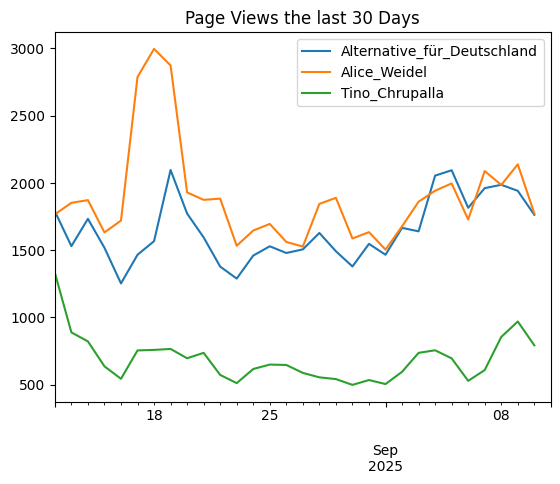

In [347]:

plot = df1_2.plot(title="Page Views the last 30 Days")
plot
# Feel free to add your own features in pull requests!

In [348]:

quest2 = p.project_views(['ro.wikipedia', 'de.wikipedia', 'commons.wikimedia'])


In [349]:

quest3 = p.top_articles('en.wikipedia', limit=10)


In [350]:

quest4 = p.top_by_country('en.wikipedia', limit=10)


In [351]:
quest5 = p.top_per_country('in', limit=10)


In [352]:
quest6 = p.article_views('de.wikipedia', ['Alternative für Deutschland'], granularity='daily', start='20241101', end='20250228')


df6 = pd.DataFrame(quest6)
df6


,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05,2024-11-06,2024-11-07,2024-11-08,2024-11-09,2024-11-10,...,2025-02-19,2025-02-20,2025-02-21,2025-02-22,2025-02-23,2025-02-24,2025-02-25,2025-02-26,2025-02-27,2025-02-28
Alternative_für_Deutschland,1223,1323,1309,1601,1769,3024,4722,3550,2612,2679,...,12826,11416,10512,12667,60913,46538,19592,14399,8108,6006


In [ ]:
df6_2 = df6.transpose()
df6_2

,Alternative_für_Deutschland
2024-11-01,1223
2024-11-02,1323
2024-11-03,1309
2024-11-04,1601
2024-11-05,1769
...,...
2025-02-24,46538
2025-02-25,19592
2025-02-26,14399
2025-02-27,8108


In [354]:
df6_3 = df6_2.sort_index()

df6_3

,Alternative_für_Deutschland
2024-11-01,1223
2024-11-02,1323
2024-11-03,1309
2024-11-04,1601
2024-11-05,1769
...,...
2025-02-24,46538
2025-02-25,19592
2025-02-26,14399
2025-02-27,8108


In [ ]:
df6_3.axes

[DatetimeIndex(['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04',
                '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08',
                '2024-11-09', '2024-11-10',
                ...
                '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-22',
                '2025-02-23', '2025-02-24', '2025-02-25', '2025-02-26',
                '2025-02-27', '2025-02-28'],
               dtype='datetime64[ns]', length=120, freq=None),
 Index(['Alternative_für_Deutschland'], dtype='object')]

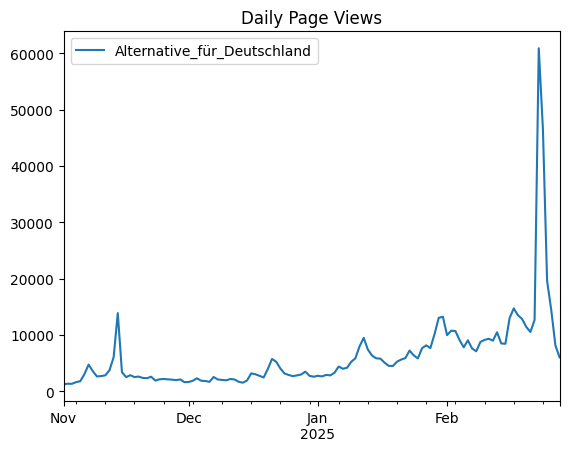

In [356]:
plot = df6_3.plot(title='Daily Page Views')

In [362]:
# Make sure index is datetime
df6_3.index = pd.to_datetime(df6_3.index)

# Resample to weekly (sum of daily views per week)
weekly_views = df6_3.resample('W-MON').sum()


In [363]:
weekly_views

,Alternative_für_Deutschland
2024-11-04,5456
2024-11-11,21166
2024-11-18,34774
2024-11-25,15952
2024-12-02,13269
2024-12-09,14185
2024-12-16,14376
2024-12-23,27081
2024-12-30,20642
2025-01-06,21271


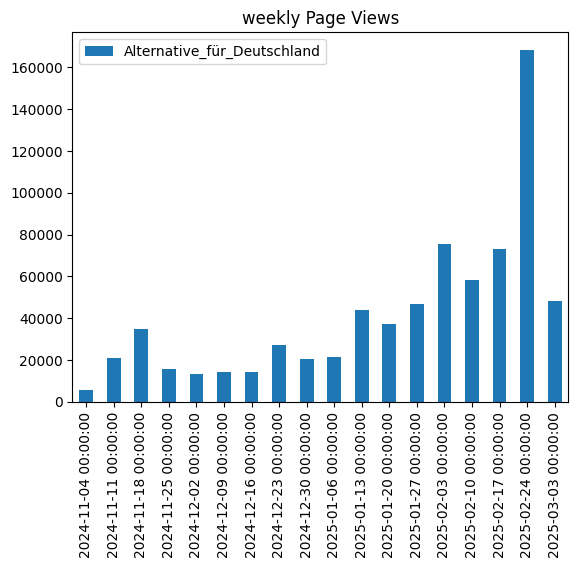

In [364]:
plotweekly = weekly_views.plot(title='weekly Page Views', kind = 'bar')

In [366]:
weekly_views.to_csv('quest2_wiki.csv')
df6_3.to_csv('quest2_wiki_daily.csv')